# Importing all the necessary packages required for the EDA, Visualization and Modelling

In [1]:
import numpy as np # Mathematical Calculations
import pandas as pd # Data operations and summaries
import seaborn as sns # Good data visualizations
import matplotlib.pyplot as plt # basic Visualizations
import statsmodels.api as sm # Statistical Models
import warnings
from scipy import stats
import colorama
from colorama import Fore

#Scikit- Learn Packages
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,QuantileTransformer

# For Feature Selection
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

# For Undersampling
from imblearn.under_sampling import RandomUnderSampler
import random

# For Model Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

# For Modelling 
from sklearn.linear_model import Perceptron # For Perceptron Model 
from sklearn.linear_model import LogisticRegression,SGDClassifier # For Logistic Regression and SGD Classifier 
from sklearn.ensemble import RandomForestClassifier # For Randon Forest Classifier

# For Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier # For K Neighbour Trees

from sklearn.svm import SVC # For Support Vector Model

from sklearn.tree import DecisionTreeClassifier # For Decision Tress Classifier

from xgboost import XGBClassifier # For SFBClassifier

from sklearn.naive_bayes import BernoulliNB # For Bernoulli Classifier

warnings.simplefilter(action='ignore')

# Importing the Dataset 

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Preliminary Checks

In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Count the number of missing values ine ach column
df.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [9]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Checking the data types of all the columns
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# Checking the skewness of all the columns
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [12]:
# Checking the kurtosis of all the columns
df.kurtosis()

CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

# Descriptive Statistics

In [13]:
# Count the number of missing values ine ach column
df.isnull().sum().sort_values(ascending=False)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(exclude='object').columns

# Display the Frequency of each of the categories in the cateogircal columns
for var in cat_columns: 
    print("Name of the Category---------", var)
    print(df[var].value_counts())

Name of the Category--------- Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Name of the Category--------- Gender
Male      5457
Female    4543
Name: Gender, dtype: int64


In [15]:
for var in cat_columns[cat_columns != 'Exited']: 
    print(df[[var, "Exited"]].groupby(var, as_index=False).mean().sort_values(by='Exited', ascending=False))

  Geography    Exited
1   Germany  0.324432
2     Spain  0.166734
0    France  0.161548
   Gender    Exited
0  Female  0.250715
1    Male  0.164559


In [16]:
# One categorical One numerical column - Descriptive Statistics across the categories
for var in cat_columns: 
    print(df.groupby(var).median())

           CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
Geography                                                                   
France           653.0  37.0     5.0   62153.50            1.0        1.0   
Germany          651.0  38.0     5.0  119703.10            1.0        1.0   
Spain            651.0  37.0     5.0   61710.44            2.0        1.0   

           IsActiveMember  EstimatedSalary  Exited  
Geography                                           
France                1.0         99132.31     0.0  
Germany               0.0        102397.22     0.0  
Spain                 1.0         99984.86     0.0  
        CreditScore   Age  Tenure   Balance  NumOfProducts  HasCrCard  \
Gender                                                                  
Female        652.0  38.0     5.0  96147.55            1.0        1.0   
Male          651.0  37.0     5.0  98064.97            1.0        1.0   

        IsActiveMember  EstimatedSalary  Exited  
Gender

In [17]:
from itertools import product
cat1 = df[cat_columns]
cat2 = df[cat_columns]
cat_var_prod = list(product(cat1,cat2, repeat = 1))
# Cross Tabulations of the categorical variables
for var1 in cat_columns:
    for var2 in cat_columns:
        print(pd.crosstab(df[var1], df[var2], normalize=True))

Geography  France  Germany   Spain
Geography                         
France     0.5014   0.0000  0.0000
Germany    0.0000   0.2509  0.0000
Spain      0.0000   0.0000  0.2477
Gender     Female    Male
Geography                
France     0.2261  0.2753
Germany    0.1193  0.1316
Spain      0.1089  0.1388
Geography  France  Germany   Spain
Gender                            
Female     0.2261   0.1193  0.1089
Male       0.2753   0.1316  0.1388
Gender  Female    Male
Gender                
Female  0.4543  0.0000
Male    0.0000  0.5457


In [18]:
cat_var_prod

[('Geography', 'Geography'),
 ('Geography', 'Gender'),
 ('Gender', 'Geography'),
 ('Gender', 'Gender')]

In [19]:
import scipy.stats as ss
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df[i[0]], df[i[1]])))[1]))
result
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "p-value"])
chi_test_output

,var1,var2,p-value
0,Geography,Gender,0.031459
1,Gender,Geography,0.031459


As we infer from above output that multicollinearity exists between the Geography and Gender

# VISUALIZATIONS

In [20]:
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(exclude='object').columns

<AxesSubplot:>

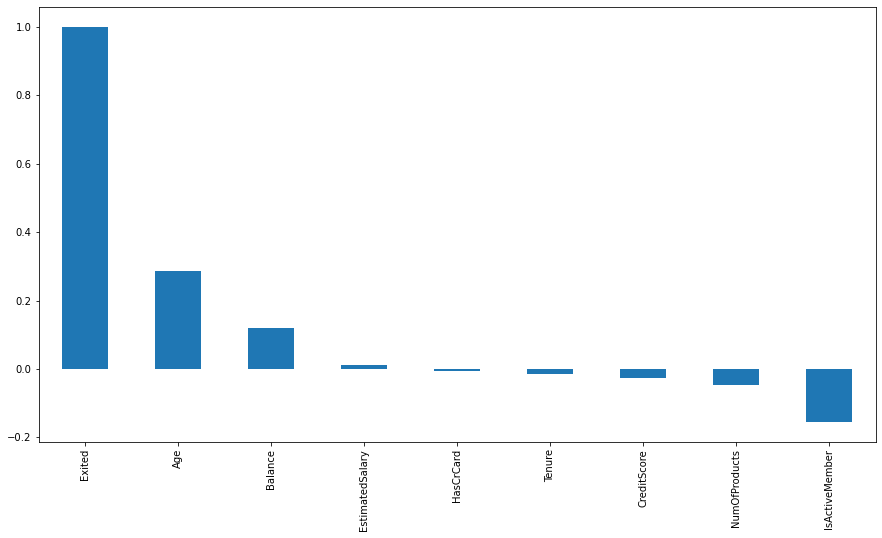

In [21]:
plt.figure(figsize=(15,8))
df.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

<Figure size 432x288 with 0 Axes>

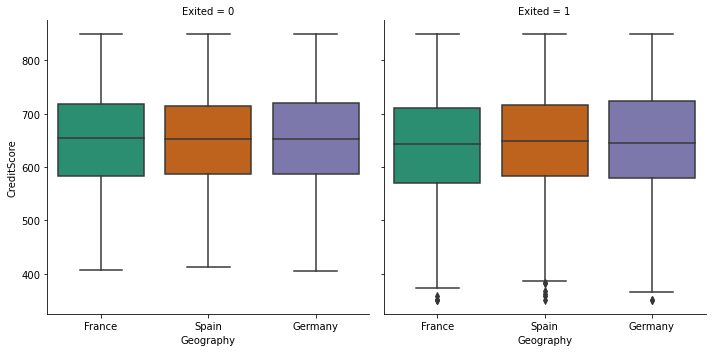

<Figure size 432x288 with 0 Axes>

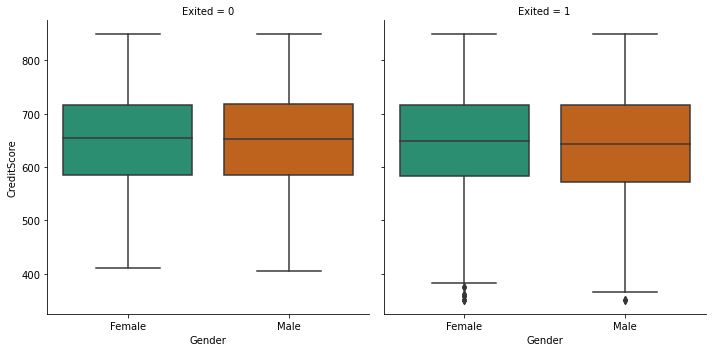

<Figure size 432x288 with 0 Axes>

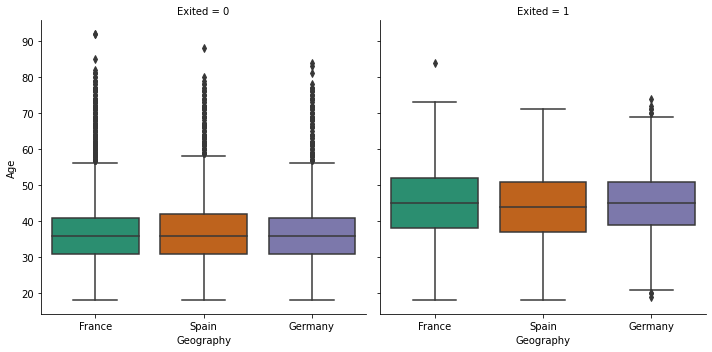

<Figure size 432x288 with 0 Axes>

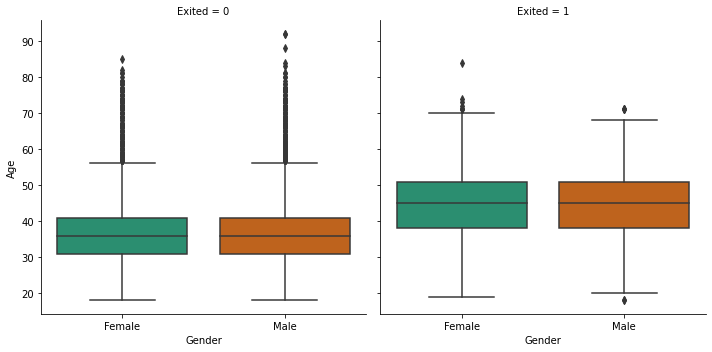

<Figure size 432x288 with 0 Axes>

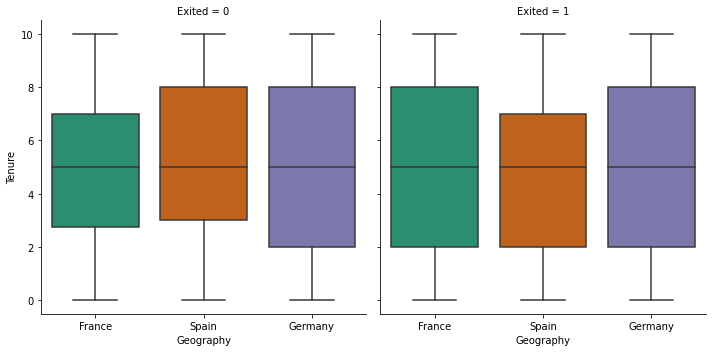

<Figure size 432x288 with 0 Axes>

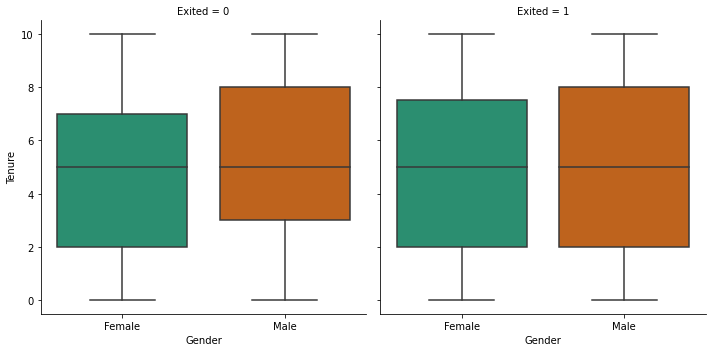

<Figure size 432x288 with 0 Axes>

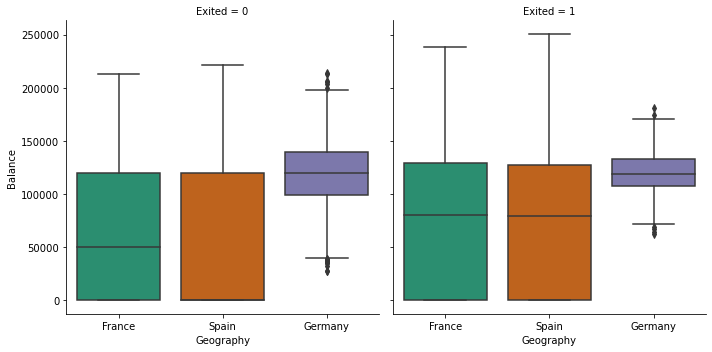

<Figure size 432x288 with 0 Axes>

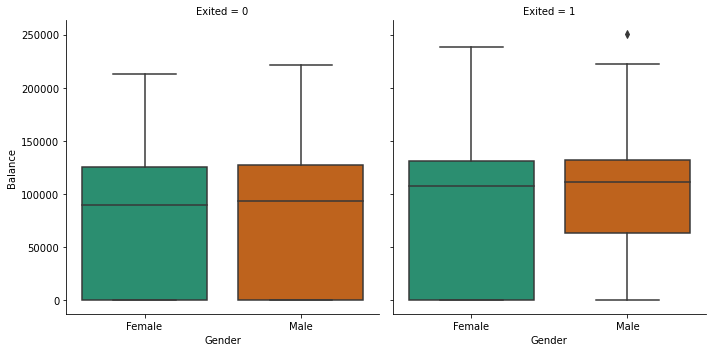

<Figure size 432x288 with 0 Axes>

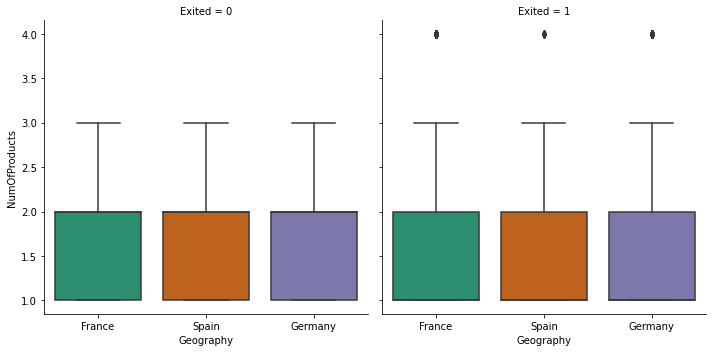

<Figure size 432x288 with 0 Axes>

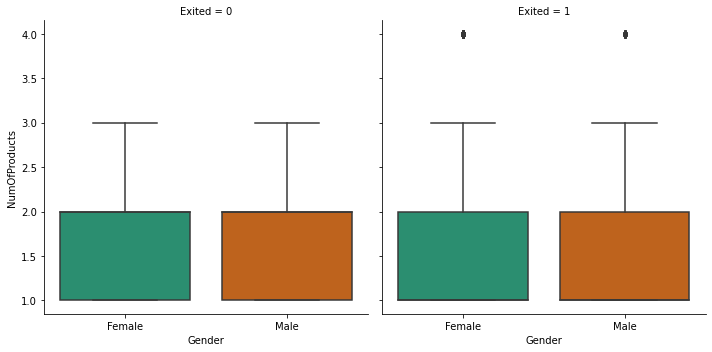

<Figure size 432x288 with 0 Axes>

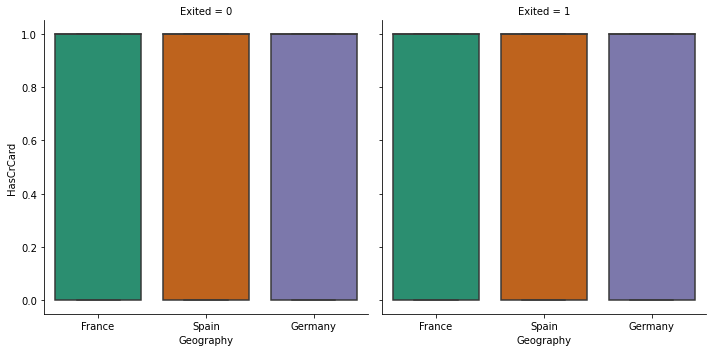

<Figure size 432x288 with 0 Axes>

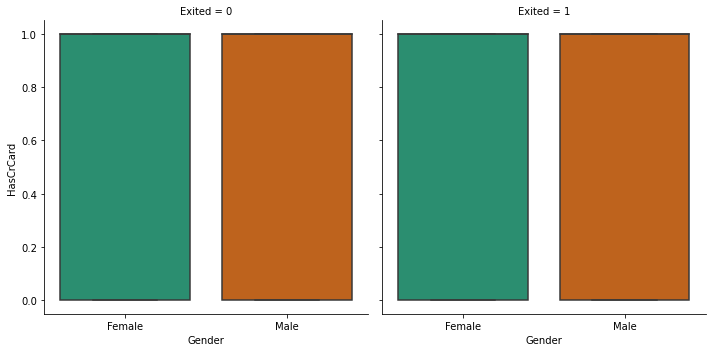

<Figure size 432x288 with 0 Axes>

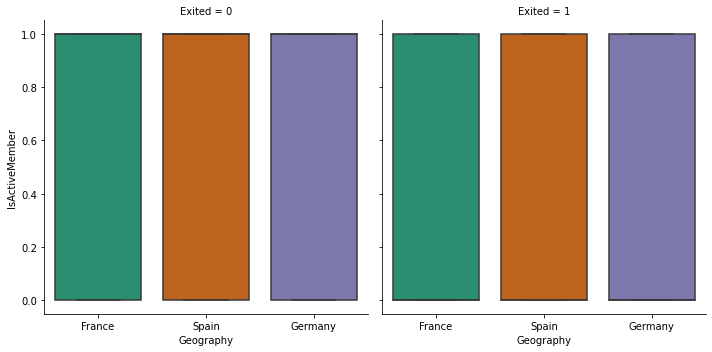

<Figure size 432x288 with 0 Axes>

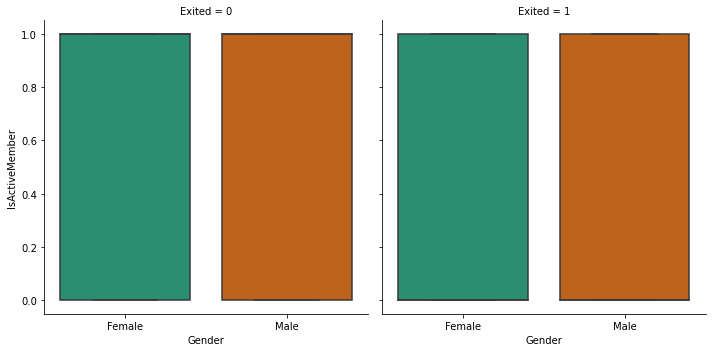

<Figure size 432x288 with 0 Axes>

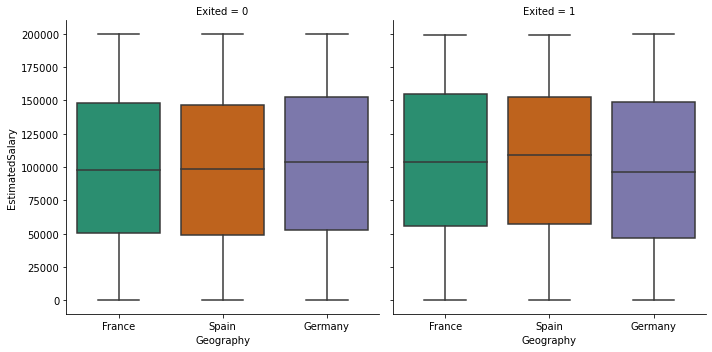

<Figure size 432x288 with 0 Axes>

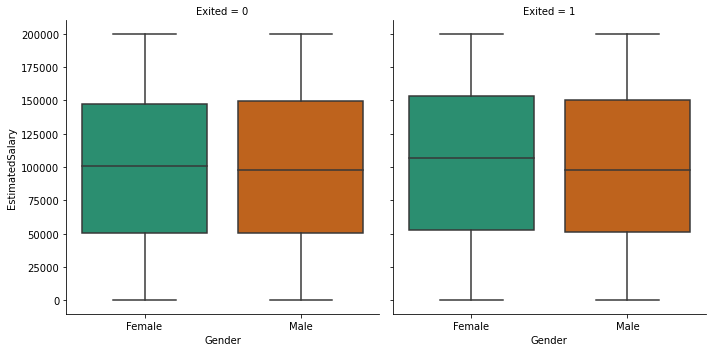

<Figure size 432x288 with 0 Axes>

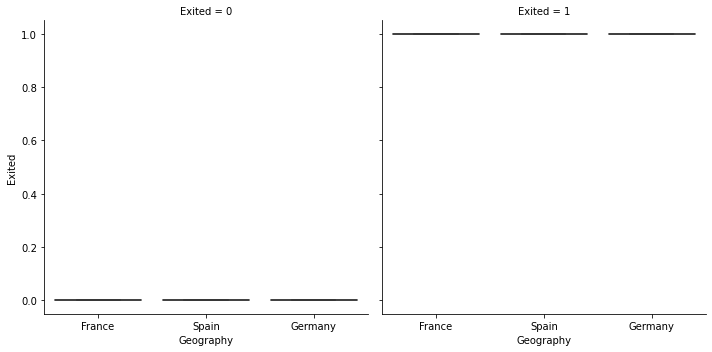

<Figure size 432x288 with 0 Axes>

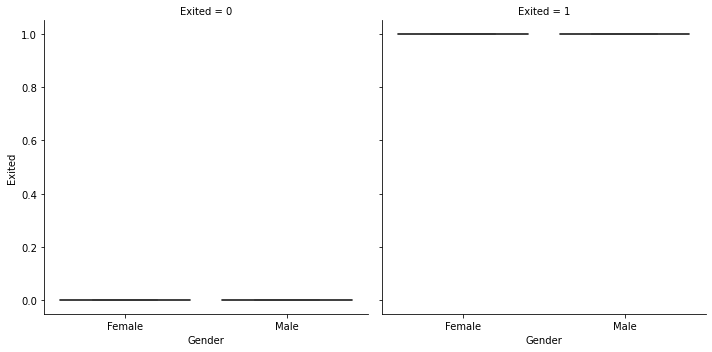

In [22]:
# Finding Outliers`
for var in num_columns: 
    for i in cat_columns:
        plt.figure()
        sns.catplot(x=i,y=var,data=df,kind='box',col='Exited',palette='Dark2')  

<h2>Inference from the box plot:</h2>
<p></p>
We can infer that there are lot of Outliers between Age and Gender, Age and Geography. As they have common attribute Age. So we have to remove outliers from the Age Column

<Figure size 1080x576 with 0 Axes>

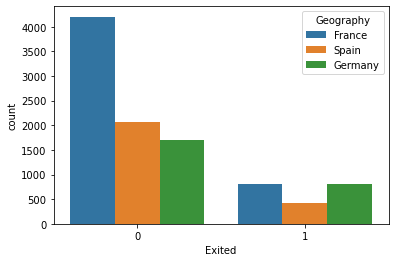

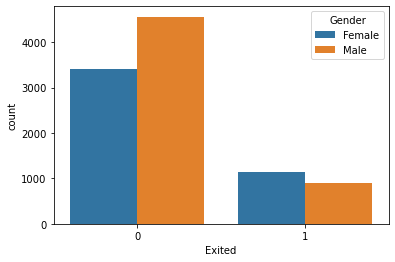

In [23]:
# Categorical Columns - Bivariate - Simple Frequency Chart distributed across categories
plt.figure(figsize=(15,8))
for var in cat_columns: 
    plt.figure()
    sns.countplot(data = df, x = "Exited", hue = var)

<AxesSubplot:>

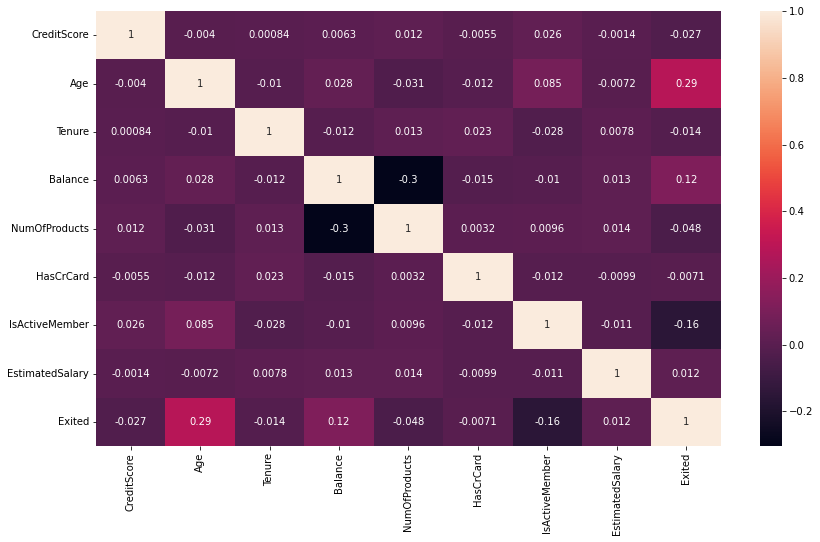

In [24]:
# Heatmap representation of correlation
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)

# Removing Outliers

In [25]:
q25=np.quantile(df["Age"],0.25)
q75=np.quantile(df["Age"],0.75)

iqr=q75-q25

lower=q25-1.5*iqr
upper=q75+1.5*iqr

print('The IQR is',iqr)
print('The lower bound value is', lower)
print('The upper bound value is', upper)


The IQR is 12.0
The lower bound value is 14.0
The upper bound value is 62.0


In [26]:
df=df[(df["Age"]<upper)&(df["Age"]>lower)]

In [27]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Constant Features Removal (Zero Variance Removal)

In [28]:
# Filter out any variables with a single constant value
df=pd.get_dummies(df)
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)

VarianceThreshold(threshold=0)

In [29]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# Quasi Constant Removal (Near Zero Variance)¶

In [30]:
quasi_constant_filter = VarianceThreshold(threshold=0.001)
quasi_constant_filter.fit(df)

VarianceThreshold(threshold=0.001)

In [31]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# Data Preparation for Modelling

In [32]:
# Separate the features variables from the Target Variables

X = df.drop(['Exited'],axis = 1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Correlated Feature Removal

<AxesSubplot:>

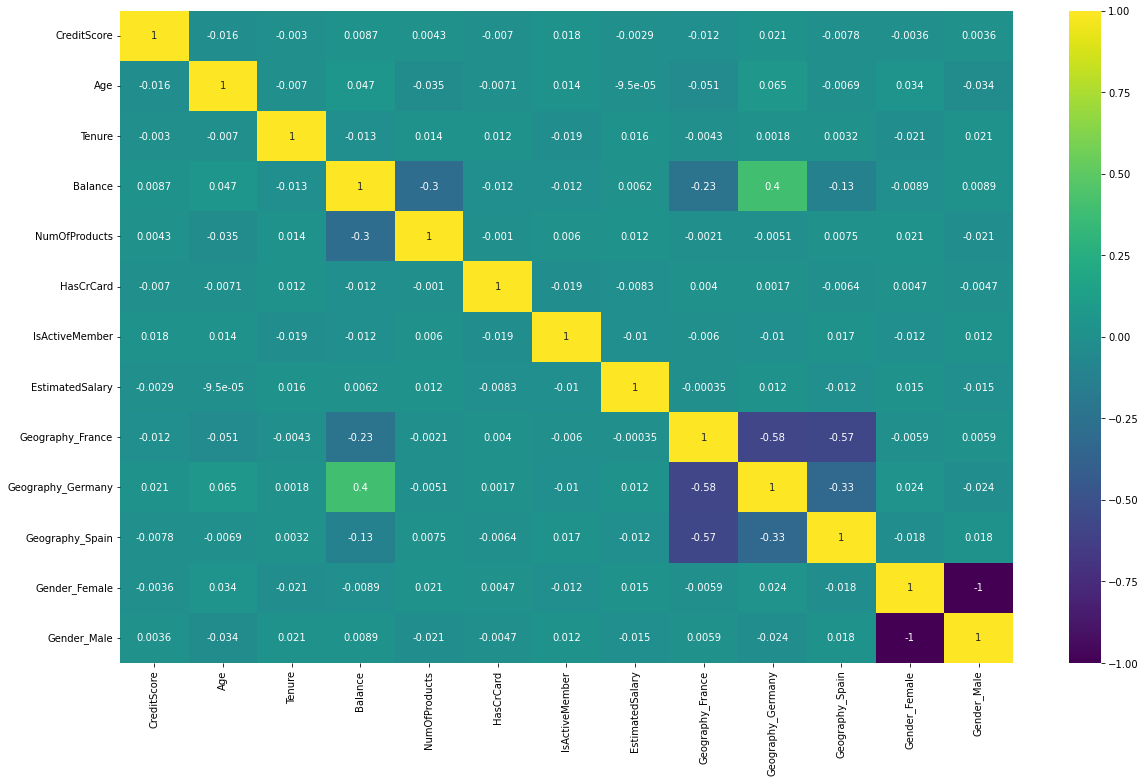

In [33]:
# Take paiwise correlation

corrmat = X_train.corr()
# Heat Map of the correlation

plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot = True, cmap = 'viridis')

In [34]:
# Function to capture pair wise correlations greater than a set threshold

def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [35]:
corr_features = get_correlation(X_train, 1)
corr_features

set()

In [36]:
# Simple outright dropping of the correlated columns
X_train = X_train.drop(labels=corr_features, axis = 1)
X_test = X_test.drop(labels = corr_features, axis = 1)

# Feature Selection based on F values

In [37]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [38]:
sel = f_classif(X_train, y_train)
sel

(array([5.27702468e+00, 1.08295020e+03, 1.32593630e+00, 9.33447187e+01,
        9.97542754e+00, 2.18017791e-01, 1.21496099e+02, 1.03247570e-01,
        7.13784378e+01, 2.25908315e+02, 2.65815049e+01, 8.30786280e+01,
        8.30786280e+01]),
 array([2.16372428e-002, 2.33302258e-221, 2.49567736e-001, 5.97126118e-022,
        1.59300015e-003, 6.40568581e-001, 4.98532089e-028, 7.47976030e-001,
        3.53357190e-017, 2.68778945e-050, 2.59391440e-007, 1.00634483e-019,
        1.00634483e-019]))

In [39]:
p_values = pd.Series(sel[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = True, inplace = True)

<AxesSubplot:>

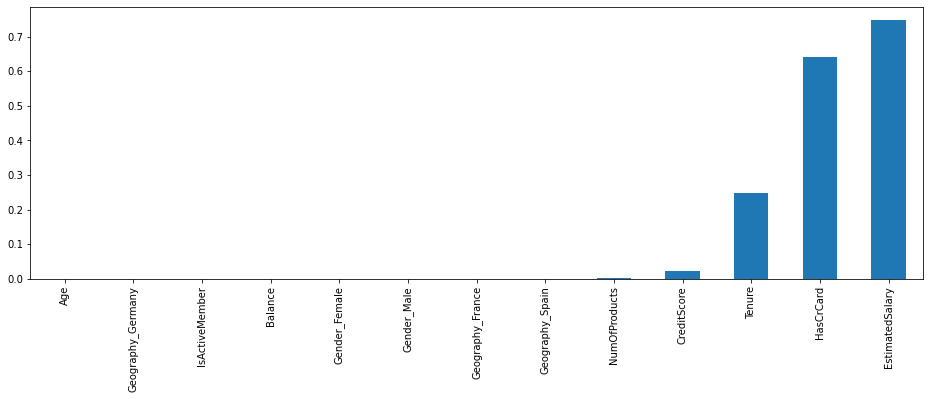

In [40]:
p_values.plot.bar(figsize = (16, 5))

In [41]:
p_values = p_values[p_values<0.05]

In [42]:
 p_values

Age                  2.333023e-221
Geography_Germany     2.687789e-50
IsActiveMember        4.985321e-28
Balance               5.971261e-22
Gender_Female         1.006345e-19
Gender_Male           1.006345e-19
Geography_France      3.533572e-17
Geography_Spain       2.593914e-07
NumOfProducts         1.593000e-03
CreditScore           2.163724e-02
dtype: float64

In [43]:
p_values.index

Index(['Age', 'Geography_Germany', 'IsActiveMember', 'Balance',
       'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Spain',
       'NumOfProducts', 'CreditScore'],
      dtype='object')

In [44]:
from collections import Counter
print(Counter(y))

Counter({0: 7646, 1: 1943})


Inference from the Target Variable:
As we can see that majority of values are 0 ,so data is very much unbalanced.So we will use sampling techniques to create a balanced dataset. Here we have to use Undersampling technique to create a balanced dataset

# Undersampling the dataset 

In [45]:
random.seed(5)

rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(Counter(y_resampled))

Counter({0: 1943, 1: 1943})


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

X_train = X_train[p_values.index]
X_test = X_test[p_values.index]

# Converting all the dataset into int format
y_train = y_train.astype('int')
y_test = y_test.astype('int')

<Figure size 720x288 with 0 Axes>

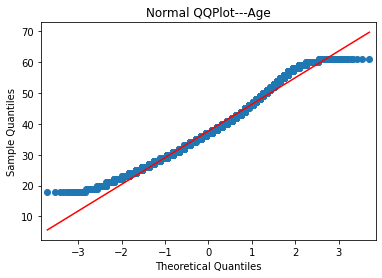

<Figure size 720x288 with 0 Axes>

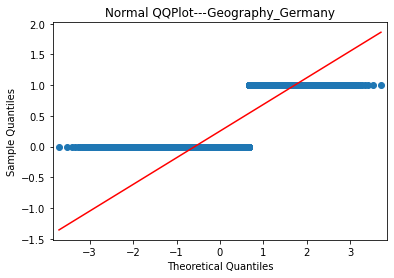

<Figure size 720x288 with 0 Axes>

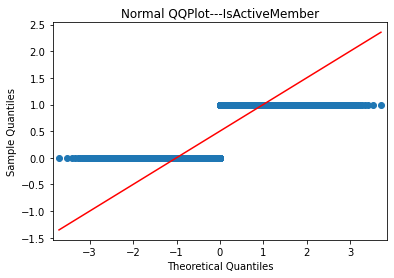

<Figure size 720x288 with 0 Axes>

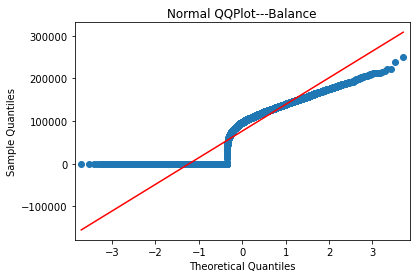

<Figure size 720x288 with 0 Axes>

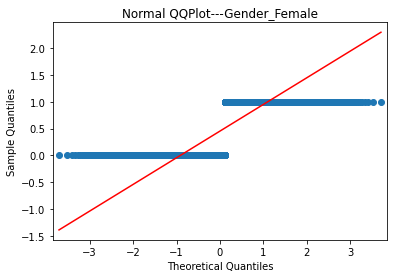

<Figure size 720x288 with 0 Axes>

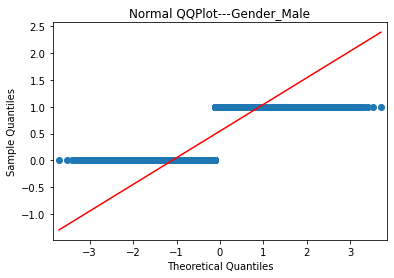

<Figure size 720x288 with 0 Axes>

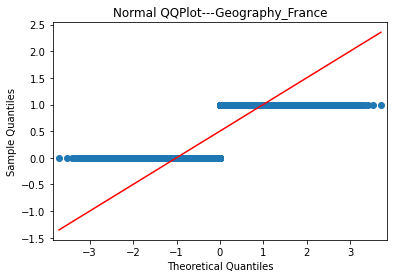

<Figure size 720x288 with 0 Axes>

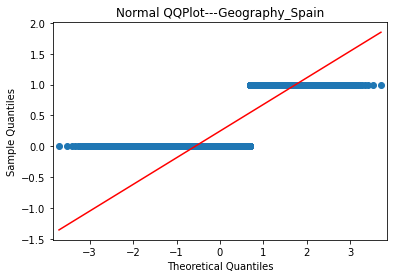

<Figure size 720x288 with 0 Axes>

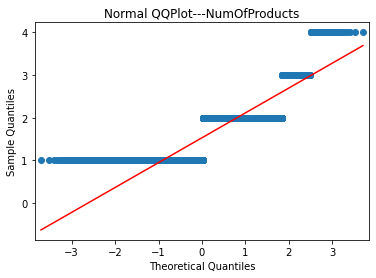

<Figure size 720x288 with 0 Axes>

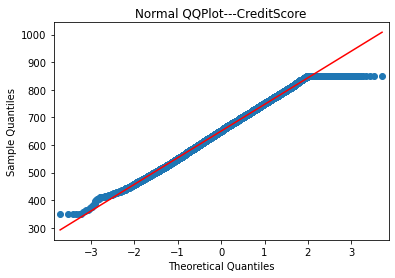

In [47]:
import statsmodels.api as sm
def qq_plots(df2):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df2,line='s')
    plt.title("Normal QQPlot---"+var)
    plt.show()
for var in p_values.index: 
    qq_plots(df[var])

# Box Cox Transformation

We are performing Box Cox or Yeo-Johnson (Non Normal transformation). 
Box Cox transformation transforms the data so that it closely resembles a normal distribution. 

In [48]:
# We are performing Box Cox or Yeo-Johnson (Non Normal transformation). 
# Box Cox transformation transforms the data so that it closely resembles a normal distribution. 

bctrans = PowerTransformer(method = 'yeo-johnson').fit(X_train)
X_train = pd.DataFrame(bctrans.transform(X_train),columns = p_values.index)
X_test = pd.DataFrame(bctrans.transform(X_test),columns = p_values.index)
X_train.head()

,Age,Geography_Germany,IsActiveMember,Balance,Gender_Female,Gender_Male,Geography_France,Geography_Spain,NumOfProducts,CreditScore
0,0.372827,1.505595,1.096617,0.690026,1.027135,-1.027135,-0.922041,-0.5533,-0.839752,0.408338
1,-0.509237,1.505595,1.096617,0.956671,1.027135,-1.027135,-0.922041,-0.5533,1.074526,-0.791331
2,-0.394417,-0.664189,-0.911895,-1.437143,-0.973582,0.973582,1.084551,-0.5533,1.074526,0.521841
3,-0.625516,-0.664189,1.096617,-1.437143,-0.973582,0.973582,1.084551,-0.5533,1.074526,-1.518501
4,-1.749492,1.505595,-0.911895,0.781024,1.027135,-1.027135,-0.922041,-0.5533,-0.839752,1.839906


<Figure size 720x288 with 0 Axes>

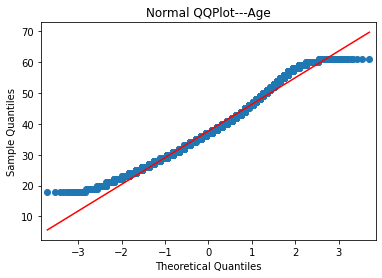

<Figure size 720x288 with 0 Axes>

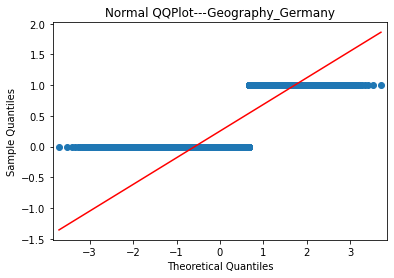

<Figure size 720x288 with 0 Axes>

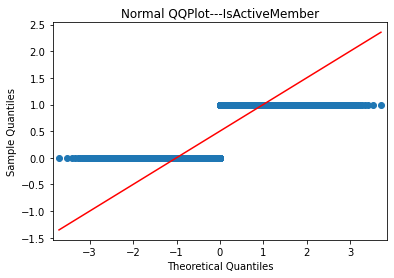

<Figure size 720x288 with 0 Axes>

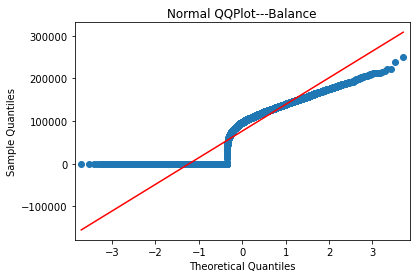

<Figure size 720x288 with 0 Axes>

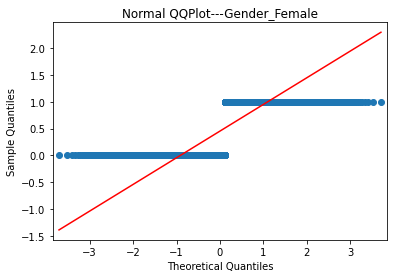

<Figure size 720x288 with 0 Axes>

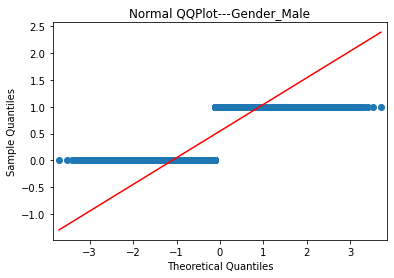

<Figure size 720x288 with 0 Axes>

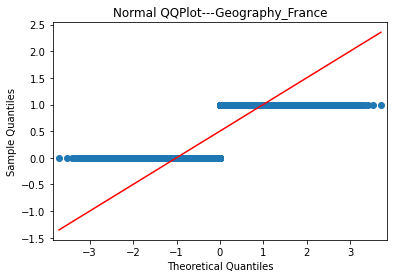

<Figure size 720x288 with 0 Axes>

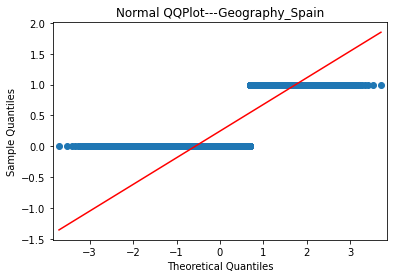

<Figure size 720x288 with 0 Axes>

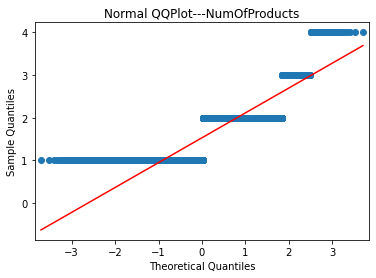

<Figure size 720x288 with 0 Axes>

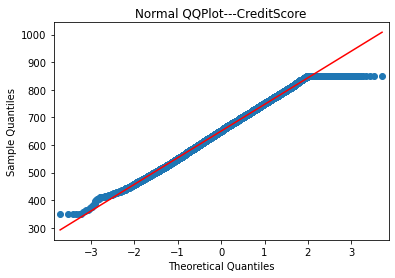

In [49]:
import statsmodels.api as sm
def qq_plots(df2):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df2,line='s')
    plt.title("Normal QQPlot---"+var)
    plt.show()
for var in p_values.index: 
    qq_plots(df[var])

# Basic Perceptron

In [50]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import cohen_kappa_score

In [51]:
model = Perceptron()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(Fore.GREEN+f"Model Coefficient: {model.coef_}")

Model Coefficient: [[ 4.16346564  0.48697285 -4.38646996  1.03806232  1.89360918 -1.89360918
  -0.32502101 -0.14743862 -0.29071786  3.04818946]]


Model Score= 65.3054221002059
F1 Score= 58.57843137254902
Balanced Accuracy Score= 65.36285883648065
Accuracy Score= 65.22633744855966
Precision Score= 73.31288343558282
Recall Score= 48.775510204081634
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       482
           1       0.73      0.49      0.59       490

    accuracy                           0.65       972
   macro avg       0.67      0.65      0.64       972
weighted avg       0.67      0.65      0.64       972

Cohen-Kappa Score= 30.640612069111118


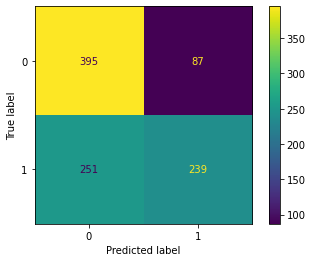

In [52]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# Logistic Regression

In [53]:
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(Fore.GREEN+f"Model Coefficient: {model.coef_}")

Model Coefficient: [[ 0.95925074  0.24826135 -0.38777442  0.0999951   0.13512694 -0.13512694
  -0.14247755 -0.10248185 -0.36147066 -0.00229445]]


Model Score= 72.47769389155799
F1 Score= 72.74633123689728
Balanced Accuracy Score= 73.27123380472521
Accuracy Score= 73.25102880658436
Precision Score= 74.78448275862068
Recall Score= 70.81632653061224
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       482
           1       0.75      0.71      0.73       490

    accuracy                           0.73       972
   macro avg       0.73      0.73      0.73       972
weighted avg       0.73      0.73      0.73       972

Cohen-Kappa Score= 46.521982021634976


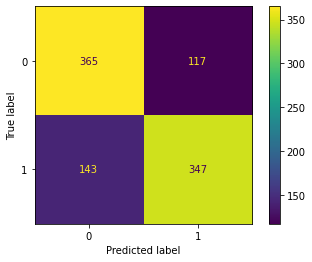

In [54]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# SGD Classifier

In [55]:
model = SGDClassifier(loss = 'log')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(Fore.GREEN+f"Model Coefficient: {model.coef_}")

Model Coefficient: [[ 0.97010406  0.32504007 -0.44403734  0.02993985 -0.05464144  0.05464144
  -0.2175263  -0.09772352 -0.42263666 -0.11922793]]


Model Score= 70.72752230610844
F1 Score= 69.20492721164614
Balanced Accuracy Score= 71.77957490049963
Accuracy Score= 71.70781893004116
Precision Score= 76.67493796526055
Recall Score= 63.06122448979592
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       482
           1       0.77      0.63      0.69       490

    accuracy                           0.72       972
   macro avg       0.72      0.72      0.72       972
weighted avg       0.72      0.72      0.72       972

Cohen-Kappa Score= 43.49506189542042


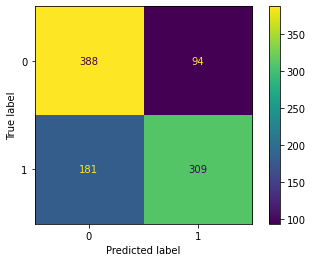

In [56]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model = RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',random_state=100)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

Model Score= 100.0
F1 Score= 76.44628099173552
Balanced Accuracy Score= 76.55178253874165
Accuracy Score= 76.5432098765432
Precision Score= 77.40585774058577
Recall Score= 75.51020408163265
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       482
           1       0.77      0.76      0.76       490

    accuracy                           0.77       972
   macro avg       0.77      0.77      0.77       972
weighted avg       0.77      0.77      0.77       972

Cohen-Kappa Score= 53.09277477691043


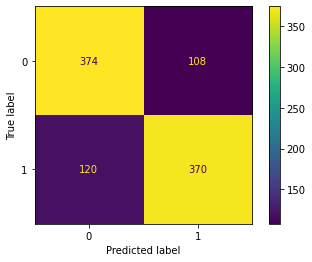

In [59]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# Boosted Trees

In [60]:
param_grid = {"n_estimators":[10,20,40,80,160,320],'max_depth':[3,4,5,6], 'max_features':['auto']}

In [61]:
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)
grid.fit(X_train,y_train)

y_pred = grid.predict(X_test)

Model Score= 100.0
F1 Score= 78.15126050420169
Balanced Accuracy Score= 78.62308408840715
Accuracy Score= 78.60082304526749
Precision Score= 80.51948051948052
Recall Score= 75.91836734693878
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       482
           1       0.81      0.76      0.78       490

    accuracy                           0.79       972
   macro avg       0.79      0.79      0.79       972
weighted avg       0.79      0.79      0.79       972

Cohen-Kappa Score= 57.21903407648165


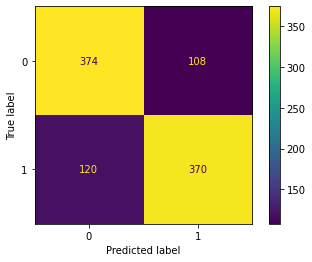

In [62]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# K Neigbours Classifier

In [63]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

Model Score= 81.0569663692519
F1 Score= 70.71352502662408
Balanced Accuracy Score= 71.74062155982726
Accuracy Score= 71.70781893004116
Precision Score= 73.94209354120267
Recall Score= 67.75510204081633
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       482
           1       0.74      0.68      0.71       490

    accuracy                           0.72       972
   macro avg       0.72      0.72      0.72       972
weighted avg       0.72      0.72      0.72       972

Cohen-Kappa Score= 43.451071319771174


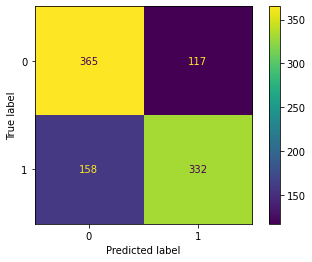

In [64]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# SVC Classifier

In [65]:
model = SVC(kernel='linear', C=1, probability=True, gamma = "auto")
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(Fore.GREEN+f"Model Coefficient: {model.coef_}")

Model Coefficient: [[ 0.91771543  0.23201749 -0.29981996  0.08812281  0.12353574 -0.12353574
  -0.14905459 -0.07707167 -0.31269384 -0.00610894]]


Model Score= 72.82086479066575
F1 Score= 72.94117647058822
Balanced Accuracy Score= 74.00753662460835
Accuracy Score= 73.97119341563786
Precision Score= 76.62921348314606
Recall Score= 69.59183673469389
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       482
           1       0.77      0.70      0.73       490

    accuracy                           0.74       972
   macro avg       0.74      0.74      0.74       972
weighted avg       0.74      0.74      0.74       972

Cohen-Kappa Score= 47.978507361651715


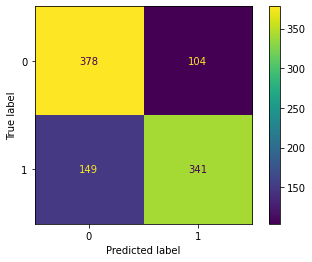

In [66]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# Decision Tree Classifier

In [67]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

Model Score= 100.0
F1 Score= 68.43718079673135
Balanced Accuracy Score= 68.20856973494791
Accuracy Score= 68.20987654320987
Precision Score= 68.50715746421268
Recall Score= 68.36734693877551
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       482
           1       0.69      0.68      0.68       490

    accuracy                           0.68       972
   macro avg       0.68      0.68      0.68       972
weighted avg       0.68      0.68      0.68       972

Cohen-Kappa Score= 36.416522711106595


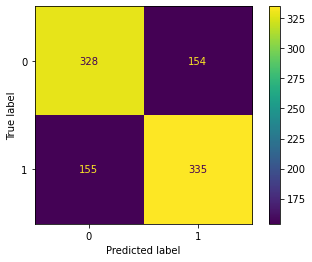

In [68]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# XGB Classifier

In [69]:
model = XGBClassifier(use_label_encoder=False, booster='gbtree')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

Model Score= 96.19080301990391
F1 Score= 77.94871794871796
Balanced Accuracy Score= 77.883394021509
Accuracy Score= 77.88065843621399
Precision Score= 78.35051546391753
Recall Score= 77.55102040816327
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       482
           1       0.78      0.78      0.78       490

    accuracy                           0.78       972
   macro avg       0.78      0.78      0.78       972
weighted avg       0.78      0.78      0.78       972

Cohen-Kappa Score= 55.762066045723955


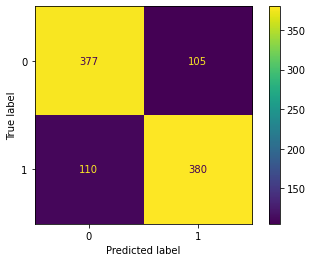

In [70]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")

# Bernoulli Classifier

In [71]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

model.fit(X_train,y_train)

print(Fore.GREEN+f"Model Coefficient: {model.coef_}")

Model Coefficient: [[-0.36307733 -0.92318731 -1.0212695  -0.2851652  -0.60441906 -0.79052134
  -0.92839114 -1.56902837 -1.20054227 -0.70629161]]


Model Score= 71.65408373369938
F1 Score= 77.94871794871796
Balanced Accuracy Score= 77.883394021509
Accuracy Score= 77.88065843621399
Precision Score= 78.35051546391753
Recall Score= 77.55102040816327
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       482
           1       0.78      0.78      0.78       490

    accuracy                           0.78       972
   macro avg       0.78      0.78      0.78       972
weighted avg       0.78      0.78      0.78       972

Cohen-Kappa Score= 55.762066045723955


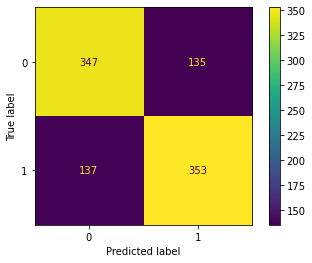

In [72]:
print(Fore.BLUE+f"Model Score= {model.score(X_train,y_train)*100}")
print(Fore.BLUE+f"F1 Score= {f1_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Balanced Accuracy Score= {balanced_accuracy_score(y_test,y_pred)*100}")
print(Fore.BLUE+f"Accuracy Score= {accuracy_score(y_test,y_pred)*100}")
print(f"Precision Score= {precision_score(y_test,y_pred)*100}")
print(f"Recall Score= {recall_score(y_test,y_pred)*100}")
plot_confusion_matrix(model,X_test,y_test)
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
print(Fore.RED +f"Cohen-Kappa Score= {cohen_kappa_score(y_test,y_pred)*100}")